#**Section 2 - Exploratory Data Analysis**

**2.1 - Image Resolution Distribution**


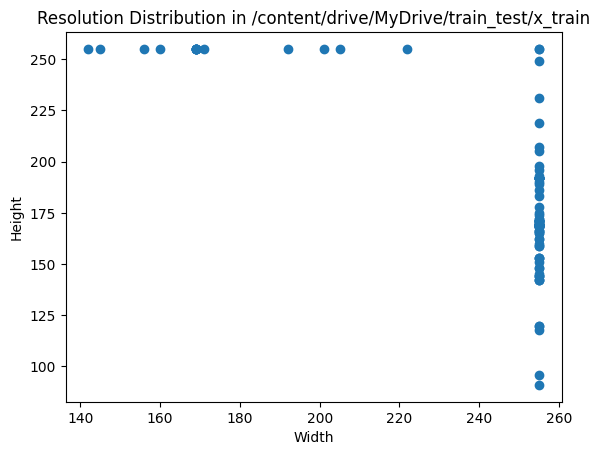

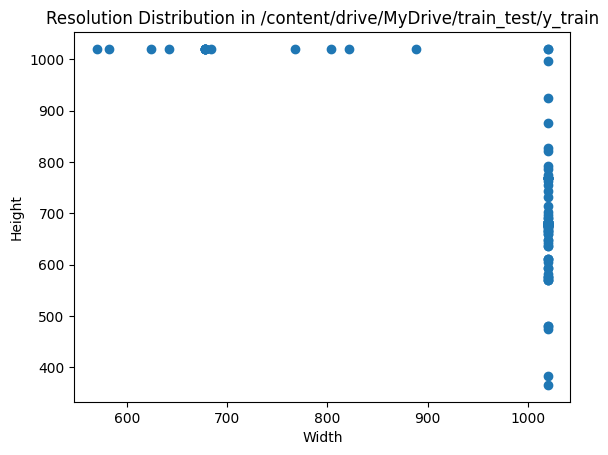

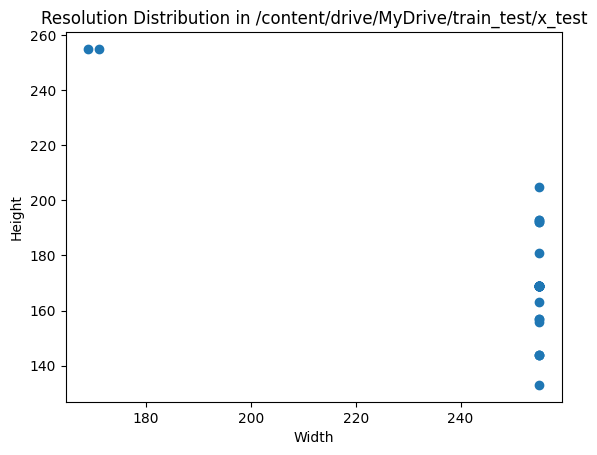

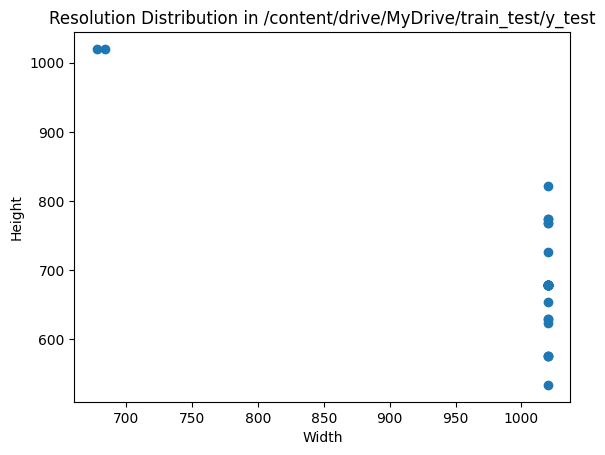

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def plot_image_resolutions(folder):
    widths, heights = [], []
    for img_name in os.listdir(folder):
        with Image.open(os.path.join(folder, img_name)) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)

    plt.scatter(widths, heights)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(f'Resolution Distribution in {folder}')
    plt.show()

plot_image_resolutions('/content/drive/MyDrive/train_test/x_train')
plot_image_resolutions('/content/drive/MyDrive/train_test/y_train')
plot_image_resolutions('/content/drive/MyDrive/train_test/x_test')
plot_image_resolutions('/content/drive/MyDrive/train_test/y_test')


**2.2 - Pixel Intensity and Color Analysis**

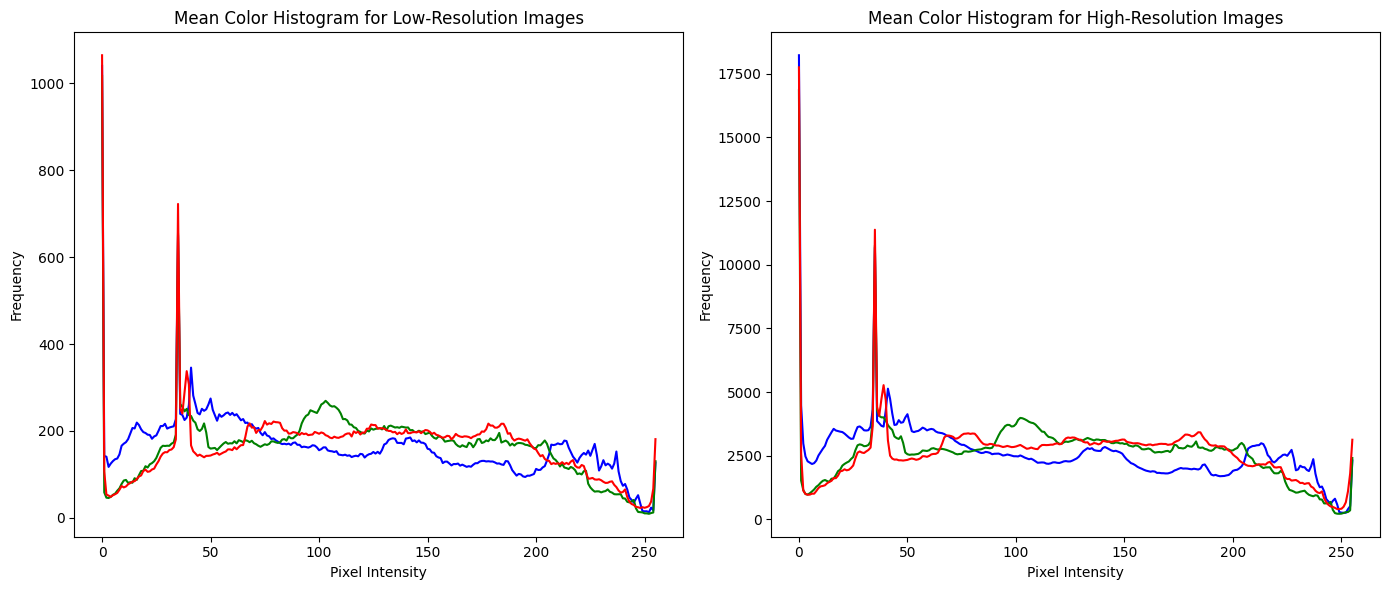

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Assuming the low-res images have filenames like '0001x8.png' and the high-res '0001x2.png'
def plot_corresponding_histograms(lr_folder, hr_folder, sample_size=30):
    # List all files in lr_folder and sample
    lr_files = [f for f in os.listdir(lr_folder) if 'x8' in f]
    sampled_lr_files = np.random.choice(lr_files, size=min(sample_size, len(lr_files)), replace=False)

    # Match the corresponding high-resolution files
    hr_files = [f.replace('x8', 'x2') for f in sampled_lr_files]

    # Load images and calculate histograms
    lr_histograms = {'b': [], 'g': [], 'r': []}
    hr_histograms = {'b': [], 'g': [], 'r': []}
    for lr_file, hr_file in zip(sampled_lr_files, hr_files):
        lr_img = cv2.imread(os.path.join(lr_folder, lr_file))
        hr_img = cv2.imread(os.path.join(hr_folder, hr_file))

        for i, color in enumerate(['b', 'g', 'r']):
            lr_hist = cv2.calcHist([lr_img], [i], None, [256], [0, 256]).flatten()
            hr_hist = cv2.calcHist([hr_img], [i], None, [256], [0, 256]).flatten()
            lr_histograms[color].append(lr_hist)
            hr_histograms[color].append(hr_hist)

    # Calculate mean histograms
    mean_lr_hists = {color: np.mean(np.array(hists), axis=0) for color, hists in lr_histograms.items()}
    mean_hr_hists = {color: np.mean(np.array(hists), axis=0) for color, hists in hr_histograms.items()}

    # Plot mean histograms for low-resolution images
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    for color in ['b', 'g', 'r']:
        plt.plot(mean_lr_hists[color], color=color)
    plt.title('Mean Color Histogram for Low-Resolution Images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Plot mean histograms for high-resolution images
    plt.subplot(1, 2, 2)
    for color in ['b', 'g', 'r']:
        plt.plot(mean_hr_hists[color], color=color)
    plt.title('Mean Color Histogram for High-Resolution Images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

train_path_x = '/content/drive/MyDrive/train_test/x_train'
train_path_y = '/content/drive/MyDrive/train_test/y_train'

# Example usage
plot_corresponding_histograms(train_path_x, train_path_y)


**2.3 - Texture and Pattern Analysis**

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

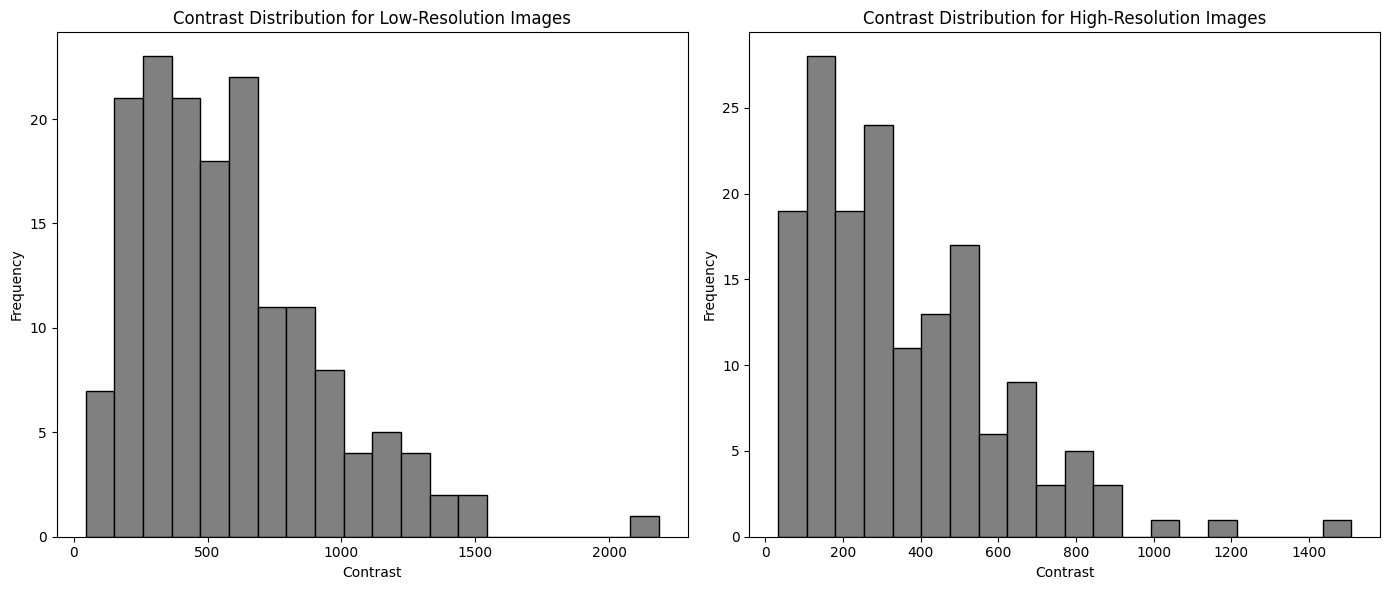

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from skimage.feature import greycomatrix, greycoprops

def texture_feature_distribution(folder):
    contrast_values = []

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        img_gray = np.array(img.convert('L'))
        glcm = greycomatrix(img_gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        contrast = greycoprops(glcm, 'contrast')
        contrast_values.append(contrast.mean())

    return contrast_values

def plot_texture_distribution(lr_folder, hr_folder):
    lr_contrast = texture_feature_distribution(lr_folder)
    hr_contrast = texture_feature_distribution(hr_folder)

    plt.figure(figsize=(14, 6))

    # Low-resolution contrast distribution
    plt.subplot(1, 2, 1)
    plt.hist(lr_contrast, bins=20, color='gray', edgecolor='black')
    plt.title('Contrast Distribution for Low-Resolution Images')
    plt.xlabel('Contrast')
    plt.ylabel('Frequency')

    # High-resolution contrast distribution
    plt.subplot(1, 2, 2)
    plt.hist(hr_contrast, bins=20, color='gray', edgecolor='black')
    plt.title('Contrast Distribution for High-Resolution Images')
    plt.xlabel('Contrast')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

lr_folder_path = '/content/drive/MyDrive/train_test/x_train'
hr_folder_path = '/content/drive/MyDrive/train_test/y_train'  # Replace with the actual path

plot_texture_distribution(lr_folder_path, hr_folder_path)

**2.4 - Noise**

100%|██████████| 160/160 [00:06<00:00, 23.45it/s]


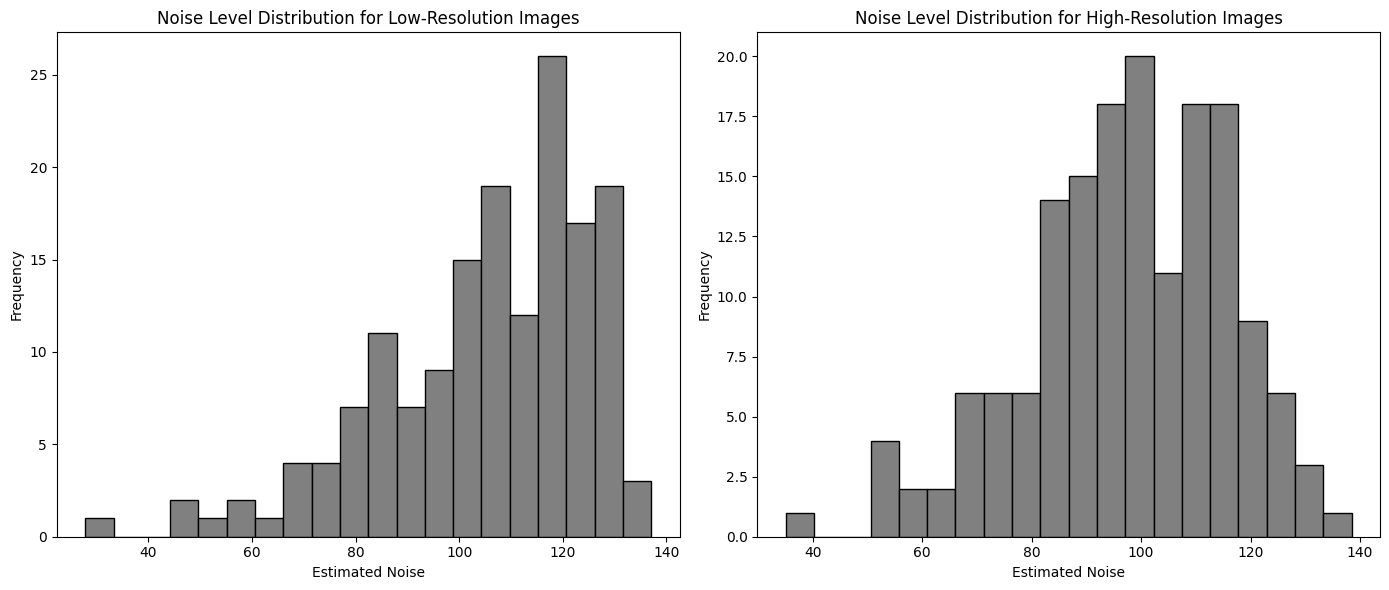

In [ ]:
from tqdm import tqdm
import cv2

def calculate_noise_levels(folder):
    noise_levels = []

    for img_name in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, 0)
        noise_est = np.mean(np.abs(img - cv2.GaussianBlur(img, (5, 5), 0)))
        noise_levels.append(noise_est)

    return noise_levels

def plot_noise_distribution(lr_folder, hr_folder):
    lr_noise_levels = calculate_noise_levels(lr_folder)
    hr_noise_levels = calculate_noise_levels(hr_folder)

    plt.figure(figsize=(14, 6))

    # Low-resolution noise level distribution
    plt.subplot(1, 2, 1)
    plt.hist(lr_noise_levels, bins=20, color='gray', edgecolor='black')
    plt.title('Noise Level Distribution for Low-Resolution Images')
    plt.xlabel('Estimated Noise')
    plt.ylabel('Frequency')

    # High-resolution noise level distribution
    plt.subplot(1, 2, 2)
    plt.hist(hr_noise_levels, bins=20, color='gray', edgecolor='black')
    plt.title('Noise Level Distribution for High-Resolution Images')
    plt.xlabel('Estimated Noise')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

lr_folder_path = '/content/drive/MyDrive/train_test/x_train'
hr_folder_path = '/content/drive/MyDrive/train_test/y_train'

plot_noise_distribution(lr_folder_path, hr_folder_path)

**2.5 - Structural Feature Variability Analysis**

100%|██████████| 160/160 [00:06<00:00, 25.46it/s]


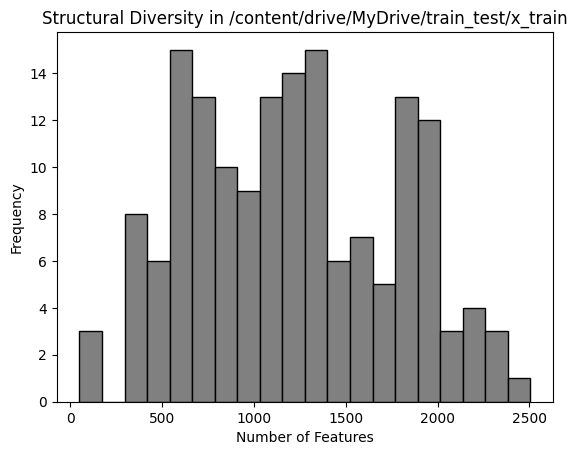

100%|██████████| 160/160 [00:20<00:00,  7.91it/s]


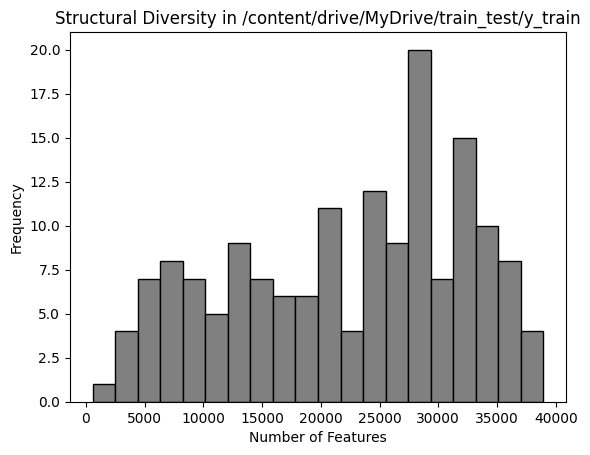

In [ ]:
def calculate_orb_features(folder, nfeatures=4000):
    orb = cv2.ORB_create(nfeatures=nfeatures)
    feature_list = []

    for img_name in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        keypoints, descriptors = orb.detectAndCompute(img, None)
        feature_list.append(descriptors)

    return feature_list

def analyze_structural_diversity(folder, nfeatures=40000):
    feature_list = calculate_orb_features(folder, nfeatures)
    feature_counts = [f.shape[0] if f is not None else 0 for f in feature_list]

    plt.hist(feature_counts, bins=20, color='gray', edgecolor='black')
    plt.title('Structural Diversity in ' + folder)
    plt.xlabel('Number of Features')
    plt.ylabel('Frequency')
    plt.show()

analyze_structural_diversity('/content/drive/MyDrive/train_test/x_train', nfeatures=4000)
analyze_structural_diversity('/content/drive/MyDrive/train_test/y_train', nfeatures=40000)